## NYC Taxi Dataset COGS 109 Final

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('nycTaxiDataset.csv')


dataset['Jan'] = np.where(dataset['pickup_date'] == 1, 1, 0)
dataset['Feb'] = np.where(dataset['pickup_date'] == 2, 1, 0)
dataset['Mar'] = np.where(dataset['pickup_date'] == 3, 1, 0)
dataset['Apr'] = np.where(dataset['pickup_date'] == 4, 1, 0)
dataset['May'] = np.where(dataset['pickup_date'] == 5, 1, 0)
dataset['Jun'] = np.where(dataset['pickup_date'] == 6, 1, 0)
dataset = dataset.drop(columns=['pickup_date'])

# Format purposes, target at the end
dataset['tripDuration'] = dataset['trip_duration']
dataset = dataset.drop(columns=['trip_duration'])
dataset.head()

,pickup_time,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Jan,Feb,Mar,Apr,May,Jun,tripDuration
0,17,1,-73.982155,40.767937,-73.964630,40.765602,0,0,1,0,0,0,455
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,0,0,0,0,1,663
2,11,1,-73.979027,40.763939,-74.005333,40.710087,1,0,0,0,0,0,2124
3,19,1,-74.010040,40.719971,-74.012268,40.706718,0,0,0,1,0,0,429
4,13,1,-73.973053,40.793209,-73.972923,40.782520,0,0,1,0,0,0,435


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

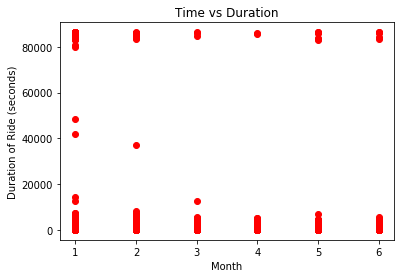

In [5]:
# Time vs Duration
timeAxis = dataset.iloc[:, 1].values
plt.title('Time vs Duration')
plt.xlabel('Month')
plt.ylabel('Duration of Ride (seconds)')
plt.scatter(timeAxis, y, color='red')
plt.show()

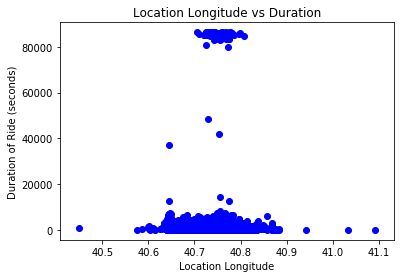

In [6]:
# Time vs Longitude
locationLongAxis = dataset.iloc[:, 3].values
plt.title('Location Longitude vs Duration')
plt.xlabel('Location Longitude')
plt.ylabel('Duration of Ride (seconds)')
plt.scatter(locationLongAxis, y, color='blue')
plt.show()

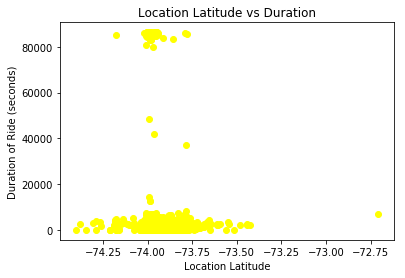

In [7]:
# Time vs Latitude
locationLatAxis = dataset.iloc[:, 4].values
plt.title('Location Latitude vs Duration')
plt.xlabel('Location Latitude')
plt.ylabel('Duration of Ride (seconds)')
plt.scatter(locationLatAxis, y, color='yellow')
plt.show()

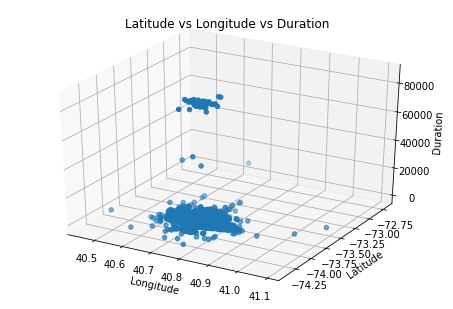

In [8]:
# Latitude vs Longitude vs Duration
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(locationLongAxis, locationLatAxis, y)
ax.set_title('Latitude vs Longitude vs Duration')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Duration')
plt.show()

In [9]:
# Building the optimal model using Backwards Elimination
import statsmodels.formula.api as sm

# We have to add a column of 1s because statsmodels.formula.api doesn't account for b0
# To include b0 we can just have x0 = 1, which will tell statsmodel.formula.api to account for b0
# Adding X to an array full of 1s
X_opt = np.append(arr = np.ones((50000, 1)).astype(int), values = X, axis = 1)


# Fit the full model with all possible predictors
# regressor ordinary least squares
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()

regressor_OLS.summary()

# Omit 12th column
X_opt = np.delete(X_opt, 12, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Omit 11th column
X_opt = np.delete(X_opt, 11, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Omit 9th column
X_opt = np.delete(X_opt, 9, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Omit 9th column
X_opt = np.delete(X_opt, 9, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Omit 8th column
X_opt = np.delete(X_opt, 8, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Omit 7th column
X_opt = np.delete(X_opt, 7, axis=1)
regressor_OLS =  sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# From here, omitting more columns brings our Rsquared down 

# Take column of 1s out from optimal model
X_opt = X_opt[:, 1:]
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     73.85
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           3.95e-92
Time:                        15:24:14   Log-Likelihood:            -4.7389e+05
No. Observations:               50000   AIC:                         9.478e+05
Df Residuals:                   49993   BIC:                         9.478e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.71e+05    4.3e+04     20.264      0.000    7.87e+05    9.55e+05
x1             3.7428      2.219      1.687      0.092      -0.606       8.091
x2            32.7793     10.741      3.052      0.002      11.728      53.831
x3          4880.9858    394.325     12.378      0.000    4108.104    5653.868
x4         -2938.9839    566.863     -5.185      0.000   -4050.041   -1827.926
x5          3312.8824    406.107      8.158      0.000    2516.909    4108.856
x6         -3539.2370    485.952     -7.283      0.000   -4491.709   -2586.765
==============================================================================
Omnibus:                   120703.094   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        960628428.171
Skew:                          25.564   Prob(JB):                         0.00
Kurtosis:                     680.117   Cond. No.                     3.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def cross_validation(random, X, X_opt, y, folds):
    x_error = []
    x_opt_error = []
    
    for i in range(folds):
        random = random.sample(frac=1)
        X = random.iloc[:, :-1].values
        y = random.iloc[:, -1].values
        
        # Size of test
        xRows, xCol = X.shape
        
        X_opt = np.append(arr = np.ones((xRows, 1)).astype(int), values = X, axis = 1)
        X_opt = np.delete(X_opt, 2, axis=1)
        X_opt = X_opt[:, 1:]
        
        # Splitting the dataset into the Training set and Test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/folds, random_state = 0)
    
        # Size of test
        rows, col = X_test.shape
        
        # Fitting Multiple Linear Regression to the Training set
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)

        numerator = 0

        for i in range(0, rows):
            numerator += (y_pred[i] - y_test[i])**2

        error = np.sqrt(numerator/(rows-1))
        x_error.append(error)
    
        X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y, test_size = 1/folds, random_state = 0)

        opt_rows, opt_cols = X_opt_test.shape

        opt_regressor = LinearRegression()
        opt_regressor.fit(X_opt_train, y_opt_train)

        y_pred_opt = opt_regressor.predict(X_opt_test)

        opt_numerator = 0

        for i in range(0, opt_rows):
            opt_numerator += (y_pred_opt[i] - y_opt_test[i])**2

        opt_error = np.sqrt(opt_numerator/(opt_rows-1))
        x_opt_error.append(opt_error)
    
    return np.mean(x_error), np.mean(x_opt_error)

In [11]:
# Shuffle
random = dataset.sample(frac=1)
X = random.iloc[:, :-1].values
y = random.iloc[:, -1].values

X_opt = np.append(arr = np.ones((50000, 1)).astype(int), values = X, axis = 1)
X_opt = np.delete(X_opt, 2, axis=1)
X_opt = X_opt[:, 1:]

standard_error, standard_opt_error = cross_validation(random, X, X_opt, y, 10)
print('The standard error of the estimates of all predictors', standard_error)
print('The standard error of the estimates of  the optimal predictors', standard_opt_error)
print('Largest value in y:', np.max(y))
print('smallest value in y:', np.min(y))

The standard error of the estimates of all predictors 3040.2404328749076
The standard error of the estimates of  the optimal predictors 3040.635887288973
Largest value in y: 86357
smallest value in y: 1


In [14]:
# Lets try it without outliers using stdev/mean
mean = np.mean(y)
std = np.std(y)

lowThresh = mean - (2*std)
highThresh = mean + (2*std)
print('Low threshold:', lowThresh)
print('High threshold:', highThresh)

# Indexes to delete

noOutliers = dataset
noOutliers = noOutliers[noOutliers.tripDuration < highThresh]
noOutliers = noOutliers[noOutliers.tripDuration > lowThresh]

out_X = noOutliers.iloc[:, :-1].values
out_y = noOutliers.iloc[:, -1].values

out_rows, out_cols = out_X.shape

out_X_opt = np.append(arr = np.ones((out_rows, 1)).astype(int), values = out_X, axis = 1)

# Fit the full model with all possible predictors
# regressor ordinary least squares
regressor_out_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()

regressor_out_OLS.summary()


# Omit 8th column
out_X_opt = np.delete(out_X_opt, 8, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 11th column
out_X_opt = np.delete(out_X_opt, 11, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 10th column
out_X_opt = np.delete(out_X_opt, 10, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 9th column
out_X_opt = np.delete(out_X_opt, 9, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 8th column
out_X_opt = np.delete(out_X_opt, 8, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 2nd column
out_X_opt = np.delete(out_X_opt, 2, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

# Omit 6th column
out_X_opt = np.delete(out_X_opt, 6, axis=1)
regressor_OLS =  sm.OLS(endog = out_y, exog = out_X_opt).fit()
regressor_OLS.summary()

out_sError, out_sError_opt = cross_validation(noOutliers, out_X, out_X_opt, out_y, 10)
print('The standard error of the estimates of all predictors in the no outlier set', out_sError)
print('The standard error of the estimates of the optimal predictors in the no outlier set', out_sError_opt)
print('Largest value in y:', np.max(out_y))
print('Smallest value in y:', np.min(out_y))

Low threshold: -5401.010477705735
High threshold: 7300.427837705734
The standard error of the estimates of all predictors in the no outlier set 585.7745516242105
The standard error of the estimates of the optimal predictors in the no outlier set 585.7807642564519
Largest value in y: 7153
Smallest value in y: 1
